<a href="https://colab.research.google.com/github/diaznugraha03/tugas-tugas/blob/main/JST_Tugas3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Import libraries
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow. keras import datasets, layers, models
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [ ]:
# Set random seed for reproducibility
np.random.seed (42)
tf.random.set_seed (42)

In [ ]:
# Load and preprocess CIFAR-10 dataset
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()
train_images = train_images.astype ("float32") / 255.0
test_images = test_images.astype ("float32") / 255.0
train_labels = to_categorical (train_labels, 10)
test_labels = to_categorical (test_labels, 10)

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


In [ ]:
# Define a function to create and compile a CNN model
def create_model(activation_function):
  model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation=activation_function, input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation=activation_function),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation=activation_function),
    layers.Flatten(),
    layers.Dense(64, activation=activation_function),
    layers.Dense(10, activation='softmax')  # Softmax for output layer
  ])
  model.compile(optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy'])
  return model

In [ ]:
# List of activation functions to compare
activation_functions = ['linear', 'sigmoid', 'tanh', 'relu', 'leaky_relu']
results = {}


In [ ]:
for activation in activation_functions:
    print(f"\nTraining model with {activation} activation...")
    if activation == 'leaky_relu':
        model = models.Sequential([
            layers.Conv2D(32, (3, 3), input_shape=(32, 32, 3)),
            layers.Activation(tf.keras.layers.LeakyReLU(alpha=0.1)),
            layers.MaxPooling2D((2, 2)),
            layers.Conv2D(64, (3, 3)),
            layers.Activation(tf.keras.layers.LeakyReLU(alpha=0.1)),
            layers.MaxPooling2D((2, 2)),
            layers.Conv2D(64, (3, 3)),
            layers.Activation(tf.keras.layers.LeakyReLU(alpha=0.1)),
            layers.Flatten(),
            layers.Dense(64),
            layers.Activation(tf.keras.layers.LeakyReLU(alpha=0.1)),
            layers.Dense(10, activation='softmax')
        ])
        model.compile(optimizer='adam',
                      loss='categorical_crossentropy',
                      metrics=['accuracy'])
    else:
        model = create_model(activation)

    history = model.fit(train_images, train_labels, epochs=10, batch_size=64, validation_split=0.2, verbose=2)
    test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=0)



Training model with linear activation...


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
625/625 - 64s - 102ms/step - accuracy: 0.4603 - loss: 1.5295 - val_accuracy: 0.5426 - val_loss: 1.3222
Epoch 2/10
625/625 - 76s - 121ms/step - accuracy: 0.5688 - loss: 1.2367 - val_accuracy: 0.5815 - val_loss: 1.2311
Epoch 3/10
625/625 - 54s - 86ms/step - accuracy: 0.6062 - loss: 1.1459 - val_accuracy: 0.5988 - val_loss: 1.1711
Epoch 4/10
625/625 - 81s - 130ms/step - accuracy: 0.6286 - loss: 1.0865 - val_accuracy: 0.6089 - val_loss: 1.1455
Epoch 5/10
625/625 - 81s - 129ms/step - accuracy: 0.6460 - loss: 1.0406 - val_accuracy: 0.6146 - val_loss: 1.1314
Epoch 6/10
625/625 - 53s - 85ms/step - accuracy: 0.6594 - loss: 1.0003 - val_accuracy: 0.6203 - val_loss: 1.1200
Epoch 7/10
625/625 - 82s - 132ms/step - accuracy: 0.6723 - loss: 0.9654 - val_accuracy: 0.6218 - val_loss: 1.1133
Epoch 8/10
625/625 - 82s - 132ms/step - accuracy: 0.6812 - loss: 0.9331 - val_accuracy: 0.6260 - val_loss: 1.1171
Epoch 9/10
625/625 - 81s - 130ms/step - accuracy: 0.6919 - loss: 0.9032 - val_accuracy: 0.

/usr/local/lib/python3.10/dist-packages/keras/src/layers/activations/leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(


Epoch 1/10
625/625 - 58s - 93ms/step - accuracy: 0.4364 - loss: 1.5511 - val_accuracy: 0.5478 - val_loss: 1.2661
Epoch 2/10
625/625 - 82s - 130ms/step - accuracy: 0.5925 - loss: 1.1558 - val_accuracy: 0.6244 - val_loss: 1.0699
Epoch 3/10
625/625 - 82s - 131ms/step - accuracy: 0.6524 - loss: 0.9893 - val_accuracy: 0.6616 - val_loss: 0.9784
Epoch 4/10
625/625 - 58s - 92ms/step - accuracy: 0.6905 - loss: 0.8831 - val_accuracy: 0.6719 - val_loss: 0.9532
Epoch 5/10
625/625 - 80s - 129ms/step - accuracy: 0.7192 - loss: 0.8048 - val_accuracy: 0.6857 - val_loss: 0.9188
Epoch 6/10
625/625 - 82s - 131ms/step - accuracy: 0.7427 - loss: 0.7390 - val_accuracy: 0.6799 - val_loss: 0.9367
Epoch 7/10
625/625 - 62s - 99ms/step - accuracy: 0.7645 - loss: 0.6792 - val_accuracy: 0.6828 - val_loss: 0.9416
Epoch 8/10
625/625 - 56s - 89ms/step - accuracy: 0.7844 - loss: 0.6227 - val_accuracy: 0.6842 - val_loss: 0.9583
Epoch 9/10
625/625 - 56s - 90ms/step - accuracy: 0.8013 - loss: 0.5785 - val_accuracy: 0.680

In [ ]:
# Store history, loss, accuracy, and confusion matrix
y_pred = model.predict (test_images)
y_pred_classes = np.argmax (y_pred, axis=1)
y_true = np.argmax (test_labels, axis=1)
conf_matrix = confusion_matrix (y_true, y_pred_classes)
results [activation] = (history, test_loss, test_acc, conf_matrix)


313/313 ━━━━━━━━━━━━━━━━━━━━ 10s 31ms/step


In [ ]:
# Plot the results for accuracy and loss
plt.figure(figsize=(16, 6))


<Figure size 1600x600 with 0 Axes>

<Figure size 1600x600 with 0 Axes>

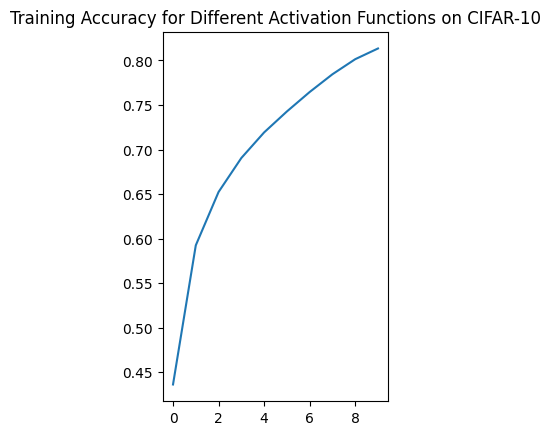

In [ ]:
# Plot training accuracy
plt.subplot(1, 2, 1)
for activation, (history, _, _,_) in results.items():
    plt.plot (history.history['accuracy'], label=f'{activation} (train)')
    plt.title('Training Accuracy for Different Activation Functions on CIFAR-10')


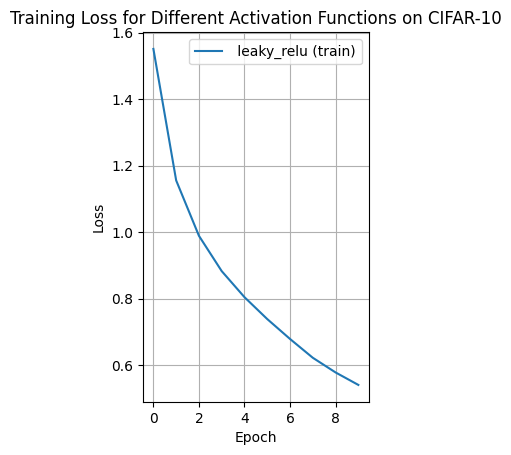

In [ ]:
# Plot training loss
plt.subplot(1, 2, 2)
for activation, (history, _, _, _) in results.items():
    plt.plot (history.history['loss'], label=f' {activation} (train)')
    plt.title('Training Loss for Different Activation Functions on CIFAR-10')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend()
    plt.grid(True)
    plt.show ()



Test accuracy with leaky_relu: 0.6800


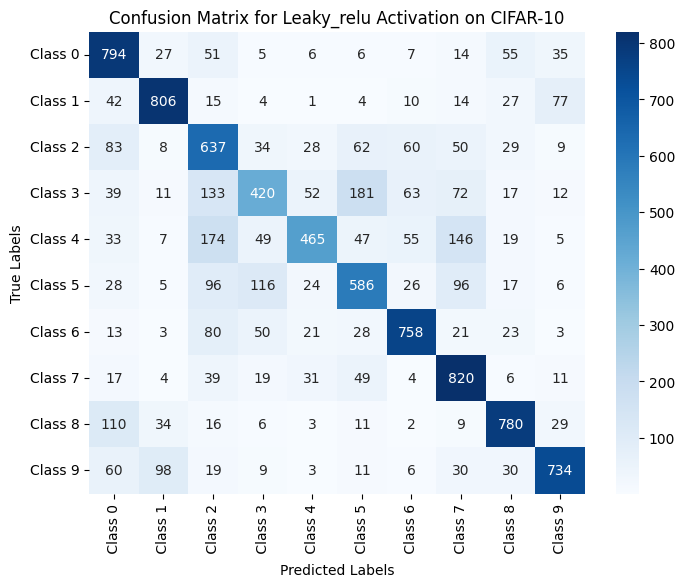

In [13]:
# Display confusion matrix for each activation function
for activation, (_, _, test_acc, conf_matrix) in results.items():
    print (f'\nTest accuracy with {activation}: {test_acc:.4f}')
    plt.figure(figsize=(8, 6))
    sns.heatmap (conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=[f' Class {i}' for i in range (10)],
    yticklabels=[f'Class {i}' for i in range (10) ])
    plt.title(f'Confusion Matrix for {activation.capitalize()} Activation on CIFAR-10')
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.show()
